In [1]:
import numpy as np
import pandas as pd
import os

CSV_PATH =os.getcwd() + "\\covid-hospit-2023-03-31-18h01.csv"
df = pd.read_csv(CSV_PATH,sep=';',
    quotechar='"',
    engine='python'
    )
print(df.head().dtypes)

dep          object
sexe          int64
jour         object
hosp          int64
rea           int64
HospConv    float64
SSR_USLD    float64
autres      float64
rad           int64
dc            int64
dtype: object


In [8]:
df["jour"] = pd.to_datetime(df["jour"])
print(df.head().dtypes)

dep                 object
sexe                 int64
jour        datetime64[ns]
hosp                 int64
rea                  int64
HospConv           float64
SSR_USLD           float64
autres             float64
rad                  int64
dc                   int64
dtype: object


In [2]:
agg_par_jour = df.drop(["dep","sexe"], axis=1).groupby("jour").sum()
print(agg_par_jour.tail())

             hosp   rea  HospConv  SSR_USLD  autres      rad      dc
jour                                                                
2023-03-27  25986  1448   14526.0    9267.0   745.0  1715906  270815
2023-03-28  26121  1433   14650.0    9293.0   745.0  1716872  270892
2023-03-29  26137  1460   14649.0    9281.0   747.0  1717875  270959
2023-03-30  26142  1458   14627.0    9304.0   753.0  1718611  271030
2023-03-31  26065  1413   14604.0    9315.0   733.0  1719619  271091


<Axes: title={'center': 'Evolution des hospitalisations par jour'}, xlabel='jour'>

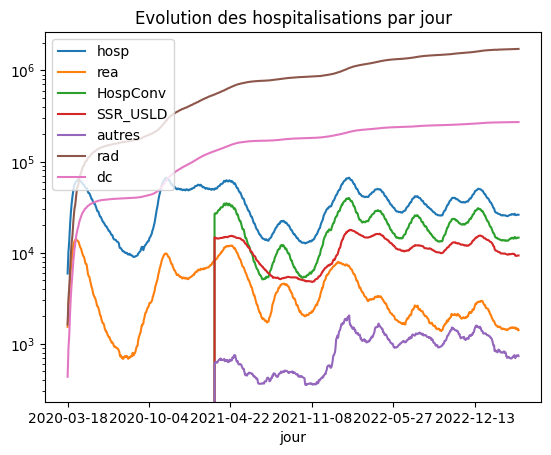

In [10]:
agg_par_jour.plot(title="Evolution des hospitalisations par jour", logy=True)

In [6]:
# Agréger par jour ET par sexe
agg_par_jour_sexe = df.drop(['dep'], axis=1).groupby(['jour', 'sexe']).sum()
print(agg_par_jour_sexe.head(10))


                 hosp   rea  HospConv  SSR_USLD  autres   rad   dc
jour       sexe                                                   
2020-03-18 0     2972   771       0.0       0.0     0.0   816  218
           1     1685   525       0.0       0.0     0.0   432  121
           2     1248   239       0.0       0.0     0.0   379   96
2020-03-19 0     4073  1002       0.0       0.0     0.0  1180  327
           1     2256   689       0.0       0.0     0.0   580  179
           2     1632   284       0.0       0.0     0.0   562  136
2020-03-20 0     5226  1297       0.0       0.0     0.0  1587  450
           1     2912   905       0.0       0.0     0.0   777  250
           2     2134   362       0.0       0.0     0.0   764  190
2020-03-21 0     5900  1453       0.0       0.0     0.0  1811  525
